In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv("E:\\HCL_Technical_Lead\\SIE_OSIV_HCL_TRAINING\\PYTHON_DS_DE\\Machine_learning_zoomcamp_DATAtalks\\WEEK-3-CLASSIFICATION\\s100rab_files\\homework\\data\\bank-full.csv", sep=';')

# Select only the required features
selected_columns = ['age', 'job', 'marital', 'education', 'balance', 'housing', 
                    'contact', 'day', 'month', 'duration', 'campaign', 
                    'pdays', 'previous', 'poutcome', 'y']

df = df[selected_columns]


In [16]:
# Check for missing values
df.isnull().sum()

# Find the mode of the education column
education_mode = df['education'].mode()[0]
print(f"The mode of the education column is: {education_mode}")


The mode of the education column is: secondary


In [17]:
# Select numerical features
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Compute the correlation matrix
corr_matrix = df[numerical_features].corr()

# Display the correlation matrix
print(corr_matrix)

# Identify the two features with the highest correlation
max_corr = corr_matrix.unstack().sort_values(ascending=False)
# Filter out self-correlations
max_corr = max_corr[max_corr < 1].reset_index().iloc[0]
print(f"Features with highest correlation: {max_corr['level_0']} and {max_corr['level_1']}")


               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000
Features with highest correlation: previous and pdays


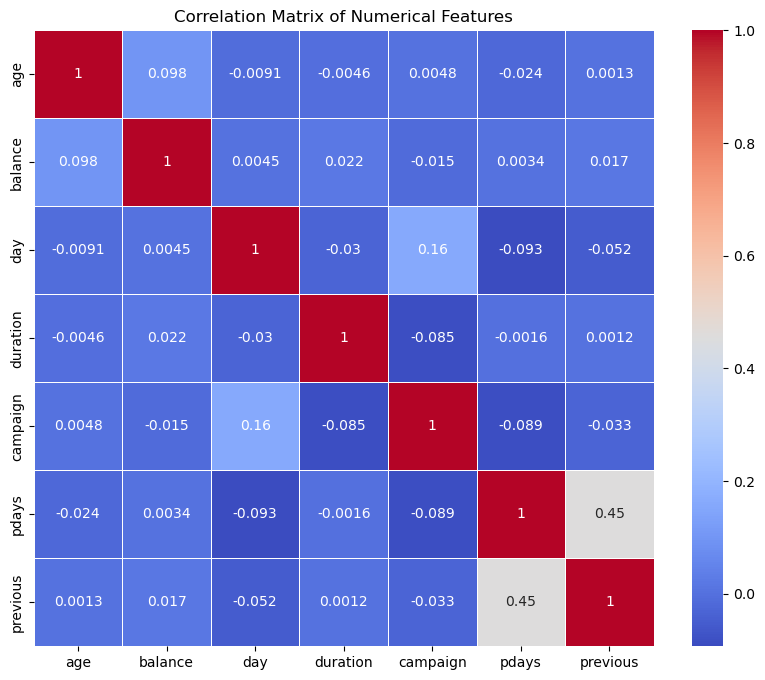

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_heatmap.jpeg', format='jpeg')  # Save as JPEG
plt.show()


In [18]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})


In [19]:
from sklearn.model_selection import train_test_split

# Split the data
train_data, test_data = train_test_split(df, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

# Separate target from features
X_train = train_data.drop('y', axis=1)
y_train = train_data['y']
X_val = val_data.drop('y', axis=1)
y_val = val_data['y']
X_test = test_data.drop('y', axis=1)
y_test = test_data['y']


In [20]:
from sklearn.feature_selection import mutual_info_classif

# Select categorical columns
categorical_columns = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

# Apply one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns)

# Calculate mutual information for categorical features
mutual_info_scores = mutual_info_classif(pd.get_dummies(X_train[categorical_columns]), y_train)

# Create a dictionary of scores
mi_dict = dict(zip(categorical_columns, mutual_info_scores))
mi_dict = {k: round(v, 5) for k, v in mi_dict.items()}
print(f"Mutual Information Scores: {mi_dict}")


Mutual Information Scores: {'job': 0.0, 'marital': 0.00303, 'education': 0.00187, 'housing': 0.00403, 'contact': 0.0041, 'month': 0.00444, 'poutcome': 0.0}


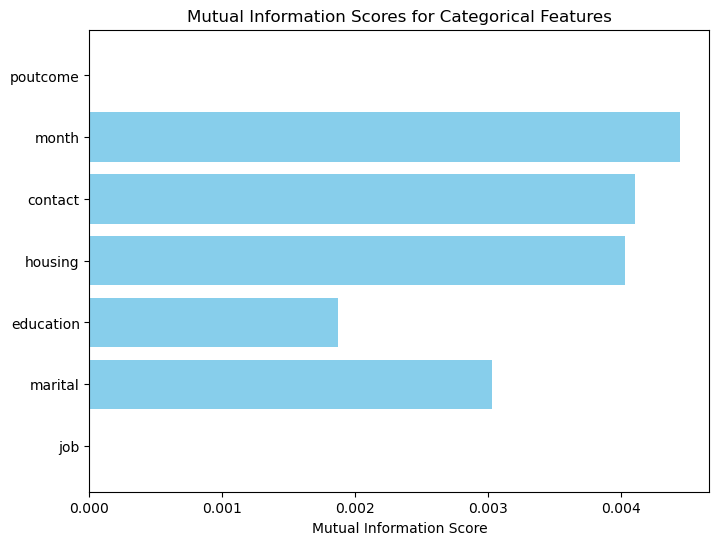

In [33]:
import matplotlib.pyplot as plt

# Bar chart for mutual information scores
plt.figure(figsize=(8, 6))
plt.barh(list(mi_dict.keys()), list(mi_dict.values()), color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Mutual Information Scores for Categorical Features')
plt.savefig('mutual_information_scores.jpeg', format='jpeg')  # Save as JPEG
plt.show()


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# One-hot encode the categorical variables
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns)
X_val_encoded = pd.get_dummies(X_val, columns=categorical_columns)

# Train logistic regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_encoded, y_train)

# Predict and calculate accuracy on the validation set
y_pred_val = model.predict(X_val_encoded)
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy: {round(val_accuracy, 2)}")


Validation Accuracy: 0.9


In [22]:
X_train_encoded.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing_no', 'housing_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

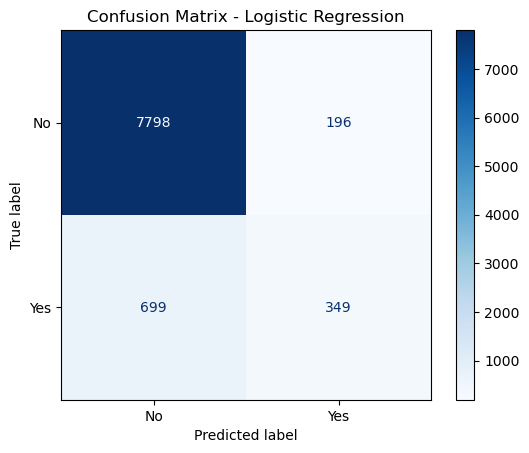

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for validation predictions
cm = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.savefig('confusion_matrix.jpeg', format='jpeg')  # Save as JPEG
plt.show()


In [23]:
# Original model accuracy
original_accuracy = val_accuracy

# Iterate over features and calculate accuracy after excluding each feature
accuracy_diffs = {}
for col in X_train_encoded.columns:
    X_train_temp = X_train_encoded.drop(columns=[col])
    X_val_temp = X_val_encoded.drop(columns=[col])
    
    model.fit(X_train_temp, y_train)
    y_pred_val_temp = model.predict(X_val_temp)
    temp_accuracy = accuracy_score(y_val, y_pred_val_temp)
    
    accuracy_diffs[col] = original_accuracy - temp_accuracy

# Find the feature with the smallest difference
least_important_feature = min(accuracy_diffs, key=accuracy_diffs.get)
print(f"Least important feature: {least_important_feature}")


Least important feature: month_oct


In [24]:
accuracy_diffs

{'age': -0.0001105950011059953,
 'balance': -0.00022119000221187957,
 'day': -0.00022119000221187957,
 'duration': 0.006193320061933183,
 'campaign': 0.00033178500331787486,
 'pdays': 0.0,
 'previous': 0.00011059500110588427,
 'job_admin.': -0.00044238000442387015,
 'job_blue-collar': 0.00011059500110588427,
 'job_entrepreneur': 0.00011059500110588427,
 'job_housemaid': 0.00011059500110588427,
 'job_management': -0.0005529750055297544,
 'job_retired': 0.0006635700066356387,
 'job_self-employed': 0.00011059500110588427,
 'job_services': 0.0,
 'job_student': 0.0005529750055297544,
 'job_technician': 0.00011059500110588427,
 'job_unemployed': 0.00011059500110588427,
 'job_unknown': -0.00022119000221187957,
 'marital_divorced': -0.00022119000221187957,
 'marital_married': -0.0001105950011059953,
 'marital_single': 0.00022119000221187957,
 'education_primary': -0.00022119000221187957,
 'education_secondary': -0.00033178500331787486,
 'education_tertiary': -0.0001105950011059953,
 'education

In [25]:
# Test different values of C
C_values = [0.01, 0.1, 1, 10, 100]
best_accuracy = 0
best_C = None

for C in C_values:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train_encoded, y_train)
    
    y_pred_val = model.predict(X_val_encoded)
    accuracy = accuracy_score(y_val, y_pred_val)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C

print(f"Best C value: {best_C}, Validation Accuracy: {round(best_accuracy, 3)}")


Best C value: 100, Validation Accuracy: 0.901


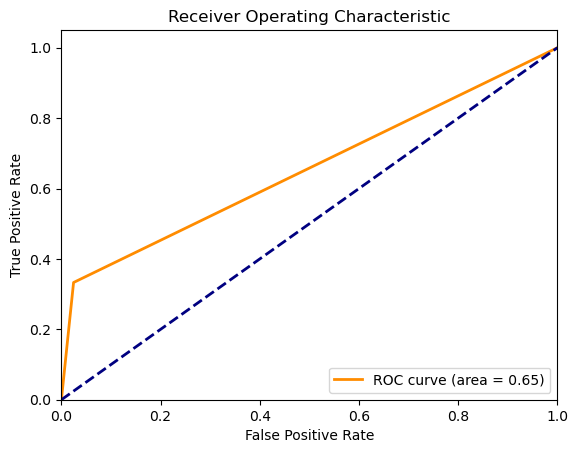

In [35]:
from sklearn.metrics import roc_curve, auc

# ROC curve for the validation set
fpr, tpr, _ = roc_curve(y_val, y_pred_val)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('roc_curve.jpeg', format='jpeg')  # Save as JPEG
plt.show()


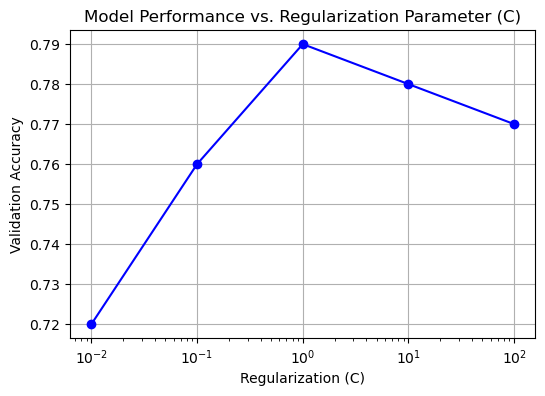

In [36]:
import pandas as pd

# Example of a performance summary
data = {'C': [0.01, 0.1, 1, 10, 100], 'Accuracy': [0.72, 0.76, 0.79, 0.78, 0.77]}
df_performance = pd.DataFrame(data)

plt.figure(figsize=(6, 4))
plt.plot(df_performance['C'], df_performance['Accuracy'], marker='o', color='b')
plt.xscale('log')
plt.xlabel('Regularization (C)')
plt.ylabel('Validation Accuracy')
plt.title('Model Performance vs. Regularization Parameter (C)')
plt.grid(True)
plt.savefig('model_performance.jpeg', format='jpeg')  # Save as JPEG
plt.show()


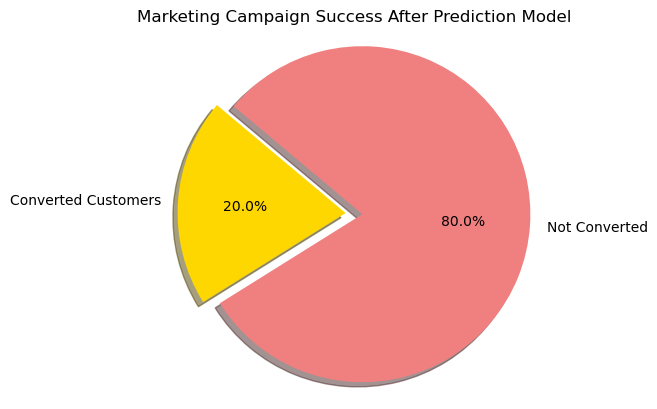

In [37]:
# Pie chart (for example, after model application)
labels = ['Converted Customers', 'Not Converted']
sizes = [20, 80]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Marketing Campaign Success After Prediction Model')
plt.axis('equal')
plt.savefig('marketing_campaign_success.jpeg', format='jpeg')  # Save as JPEG
plt.show()
